In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import datasets, linear_model, metrics
import _pickle as pickle

In [4]:
with open("dataa", "rb") as input_file:
   df = pickle.load(input_file)

In [5]:
df['CH2']=[np.nan]*len(df)
for i in range(len(df)):
    if df['CH2_SHELA'].iloc[i]!=-99 :
        if df['CH2_SPIES'].iloc[i]!=-99 :
            df['CH2'].iloc[i]=(df['CH2_SPIES'].iloc[i]+df['CH2_SHELA'].iloc[i])/2
        else :
            df['CH2'].iloc[i]=df['CH2_SHELA'].iloc[i]
    elif df['CH2_SPIES'].iloc[i]!=-99 :
        df['CH2'].iloc[i]=df['CH2_SPIES'].iloc[i]
    

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df['CH1']=[np.nan]*len(df)
for i in range(len(df)):
    if df['CH1_SHELA'].iloc[i]!=-99 :
        if df['CH1_SPIES'].iloc[i]!=-99 :
            df['CH1'].iloc[i]=(df['CH1_SPIES'].iloc[i]+df['CH1_SHELA'].iloc[i])/2
        else :
            df['CH1'].iloc[i]=df['CH1_SHELA'].iloc[i]
    elif df['CH1_SPIES'].iloc[i]!=-99 :
        df['CH1'].iloc[i]=df['CH1_SPIES'].iloc[i]
    else :
        df['CH1'].iloc[i]=np.nan
    

In [7]:
dff=df[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2','REDSHIFT','REDSHIFT_ERR','ZWARNING']].dropna()

original : 6792 samples
after removing np.nans : 1729
removing samples with z_err>10% : 1686 
after removing ZWARNING!=0 :

In [8]:
dff[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2','REDSHIFT']]=dff[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2','REDSHIFT']].replace(-99,np.nan).dropna()

In [9]:
dff=dff.where(dff['REDSHIFT_ERR']<dff['REDSHIFT']*0.1).dropna()

In [10]:
X_data,y_data=dff[['K','G','CH1','W1','U','Z','J','W2','I','H','R','CH2']],dff['REDSHIFT']

In [9]:
plt.figure()
plt.scatter(dff['K'],dff['CH1'],c=scaler.transform(np.array(dff['REDSHIFT']).reshape(-1,1)),s=10,cmap='Accent')
plt.ylabel('g-filter values')
plt.xlabel('k-filter values')
plt.title('redshift values')
plt.grid()
#plt.clim(0,0.25)
plt.legend()
plt.colorbar()

NameError: name 'scaler' is not defined

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


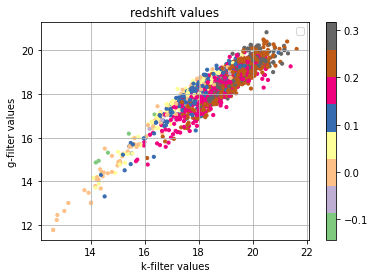

In [72]:
plt.figure()
plt.scatter(X_data['K'],X_data['CH1'],c=pred,s=10,cmap='Accent')
plt.ylabel('g-filter values')
plt.xlabel('k-filter values')
plt.title('redshift values')
plt.grid()
#plt.clim(0,0.25)
plt.legend()
plt.colorbar()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

In [11]:
def score_m(ys_data, pred):
    #zs=K.std(tf.math.divide((pred-ys_data),(1+ys_data)))
    return K.mean(K.abs(pred-ys_data))
loss_m  = metrics.make_scorer(score_m, greater_is_better=False)
def score_dz(ys_data, pred):
    #zs=K.std(tf.math.divide(K.abs(pred-ys_data),(1+ys_data)))
    return K.mean(tf.math.divide(K.abs(pred-ys_data),(1+ys_data)))
loss_dz  = metrics.make_scorer(score_dz, greater_is_better=False)

In [125]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
reg=GridSearchCV(svr,{'kernel':['rbf'],'gamma':[0.1,1],'C':[1,0.1],'epsilon':[0.01]})
reg.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 0.1], 'epsilon': [0.01], 'gamma': [0.1, 1],
                         'kernel': ['rbf']})

In [127]:
y_pred=reg.predict(X_test)

In [129]:
metrics.r2_score(y_test, y_pred)

0.6282582988512927

In [130]:
dz=(-y_test+y_pred)/(1+y_test)

In [132]:
np.std(dz)

0.1931843106058271

In [1]:
(0.135-0.1931843106058271)/0.135

-0.430994893376497

In [137]:
from sklearn.ensemble import RandomForestRegressor


In [157]:
regressor = RandomForestRegressor(n_estimators = 250)

In [158]:
regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=250)

In [159]:
y_pred_RF=regressor.predict(X_test)

In [160]:
dz1=(-y_test+y_pred_RF)/(1+y_test)

In [10]:
np.std(dz1) #n_est=50

NameError: name 'dz1' is not defined

## Shallow NN

In [10]:
import math
import numpy as np
import h5py
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.python.keras.layers as tfl
from tensorflow.python.framework import ops
#from cnn_utils import *
#from test_utils import summary, comparator
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from tensorflow.keras import regularizers

#%matplotlib inline

In [11]:
tf.keras.backend.set_floatx('float64')

In [2]:
#%matplotlib notebook
%matplotlib widget
import matplotlib.pyplot as plt

In [12]:
from tensorflow.python.keras.callbacks import LambdaCallback
import tensorflow.python.keras.backend as K
#from tf.optimizer import lbfgs_minimize

In [14]:
def Model1():
    model = tf.keras.Sequential([
        tfl.Dense(25,'tanh',input_shape=(12,)),
        tfl.Dense(1,'linear'),
        ])
    return model

In [15]:
def Model2(l2=1e-2):
    model = tf.keras.Sequential([
        tfl.Dense(25,'tanh',input_shape=(12,),kernel_regularizer=regularizers.l2(l2)),
        tfl.Dense(25,'tanh',kernel_regularizer=regularizers.l2(l2)),
        tfl.Dense(1,'linear',kernel_regularizer=regularizers.l2(l2)),
        ])
    return model

In [9]:
def Model3():
    model = tf.keras.Sequential([
        tfl.Dense(25,'tanh',input_shape=(12,),kernel_regularizer=regularizers.l2(l2=1e-5)),
        tfl.Dense(1,'linear',kernel_regularizer=regularizers.l2(l2=1e-5)),
        ])
    return model

In [14]:
model1 = Model1()
# Print a summary for each layer
for layer in summary(model1):
    print(layer)

['Dense', (None, 25), 325, 'tanh']
['Dense', (None, 1), 26, 'linear']


In [13]:
inscaler = MinMaxScaler((-1,1))
ouscaler = MinMaxScaler()
Xs_data  = inscaler.fit_transform(X_data)
ys_data  = ouscaler.fit_transform(np.array(y_data).reshape(-1,1))

In [65]:
optimizer=tf.keras.optimizers.Adam(0.0001)

In [35]:
opt_bfgs=tfp.optimizer.lbfgs_minimize(tolerance=0.01,max_iterations=1500)

NameError: name 'tfp' is not defined

In [23]:
def score_m(ys_data, pred):
    #zs=K.std(tf.math.divide((pred-ys_data),(1+ys_data)))
    return K.mean(K.abs(pred-ys_data))
loss_m  = make_scorer(score_m, greater_is_better=False)
def score_dz(ys_data, pred):
    #zs=K.std(tf.math.divide(K.abs(pred-ys_data),(1+ys_data)))
    return K.mean(tf.math.divide(K.abs(pred-ys_data),(1+ys_data)))
loss_dz  = make_scorer(score_dz, greater_is_better=False)

In [23]:
#NN = KerasRegressor(build_fn=Model1,epochs=30,batch_size=300,verbose=0)
model1.compile(optimizer=optimizer,loss=scoree)

In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                325       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [16]:
def plot_his(history,n='n'):
    if n=='n':
        N=len(history)
        hisloss=np.sum([history[i].history['loss'] for i in range(N)],axis=0)/N
        hisval=np.sum([history[i].history['val_loss'] for i in range(N)],axis=0)/N
    else :
        hisloss=history[n].history['loss']
        hisval=history[n].history['val_loss']
    plt.figure()
    plt.plot(hisloss)
    plt.plot(hisval)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

In [4]:
def return_his(history,n='n'):
    if n=='n':
        N=len(history)
        hisloss=np.sum([history[i].history['loss'] for i in range(N)],axis=0)/N
        hisval=np.sum([history[i].history['val_loss'] for i in range(N)],axis=0)/N
    else :
        hisloss=history[n].history['loss']
        hisval=history[n].history['val_loss']
    return (np.as_array(hisloss),np.as_array(hisval))

In [25]:
history=model1.fit(Xs_data, ys_data, validation_split=0.1, epochs=100)

Epoch 1/100
48/48 [==============================] - 0s 3ms/step - loss: 0.1049 - val_loss: 0.0764
Epoch 2/100
48/48 [==============================] - 0s 904us/step - loss: 0.0769 - val_loss: 0.0670
Epoch 3/100
48/48 [==============================] - 0s 870us/step - loss: 0.0710 - val_loss: 0.0644
Epoch 4/100
48/48 [==============================] - 0s 855us/step - loss: 0.0671 - val_loss: 0.0689
Epoch 5/100
48/48 [==============================] - 0s 821us/step - loss: 0.0663 - val_loss: 0.0621
Epoch 6/100
48/48 [==============================] - 0s 790us/step - loss: 0.0649 - val_loss: 0.0620
Epoch 7/100
48/48 [==============================] - 0s 802us/step - loss: 0.0647 - val_loss: 0.0643
Epoch 8/100
48/48 [==============================] - 0s 789us/step - loss: 0.0640 - val_loss: 0.0646
Epoch 9/100
48/48 [==============================] - 0s 797us/step - loss: 0.0643 - val_loss: 0.0620
Epoch 10/100
48/48 [==============================] - 0s 826us/step - loss: 0.0638 - val_loss

In [69]:
N=int(len(Xs_data)/4)
history1=[]
dz1=[]
for i in range(4):
    Xs_train,ys_train=list(Xs_data.copy()),list(ys_data.copy())
    del Xs_train[i*N:i*N+N]
    del ys_train[i*N:i*N+N]
    Xs_val,ys_val=Xs_data[i*N:i*N+N],ys_data[i*N:i*N+N]
    Xs_train,ys_train=np.array(Xs_train),np.array(ys_train)
    model1 = Model1()
    model1.compile(optimizer=optimizer,loss=score_dz)
    h=model1.fit(Xs_train, ys_train, validation_data=(Xs_val,ys_val), epochs=5000)
    pred=model1.predict(Xs_val).reshape(len(ys_val))
    dz1.append(np.array(np.abs((-ys_val.reshape(len(ys_val))+pred)/(1+ys_val.reshape(len(ys_val))))))
    history1.append(h)

Epoch 1/5000
40/40 [==============================] - 0s 2ms/step - loss: 1.2863 - val_loss: 0.6969
Epoch 2/5000
40/40 [==============================] - 0s 901us/step - loss: 0.3075 - val_loss: 0.1076
Epoch 3/5000
40/40 [==============================] - 0s 906us/step - loss: 0.0908 - val_loss: 0.0834
Epoch 4/5000
40/40 [==============================] - 0s 936us/step - loss: 0.0853 - val_loss: 0.0814
Epoch 5/5000
40/40 [==============================] - 0s 884us/step - loss: 0.0837 - val_loss: 0.0801
Epoch 6/5000
40/40 [==============================] - 0s 876us/step - loss: 0.0822 - val_loss: 0.0781
Epoch 7/5000
40/40 [==============================] - 0s 903us/step - loss: 0.0806 - val_loss: 0.0769
Epoch 8/5000
40/40 [==============================] - 0s 898us/step - loss: 0.0791 - val_loss: 0.0755
Epoch 9/5000
40/40 [==============================] - 0s 935us/step - loss: 0.0777 - val_loss: 0.0738
Epoch 10/5000
40/40 [==============================] - 0s 891us/step - loss: 0.0760 

<IPython.core.display.Javascript object>


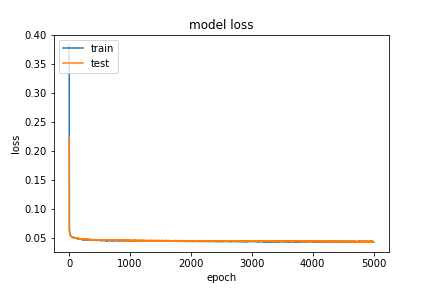

In [75]:
hisloss=np.sum([history1[i].history['loss'] for i in range(4)],axis=0)/4
hisval=np.sum([history1[i].history['val_loss'] for i in range(4)],axis=0)/4
plt.figure()
plt.plot(hisloss)
plt.plot(hisval)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [76]:
hisval[-10:-1],hisval[100]

(array([0.04365277, 0.04373557, 0.04333103, 0.04331377, 0.04356995,
        0.04340102, 0.04347415, 0.04349411, 0.04340329]),
 0.04969689466784799)

In [78]:
np.mean([np.std(dz1[i]) for i in range(4)]),np.mean([np.mean(np.abs(dz1[i])) for i in range(4)])

(0.04920239984019962, 0.04323230420592047)

In [3]:
history4

NameError: name 'history4' is not defined

<IPython.core.display.Javascript object>


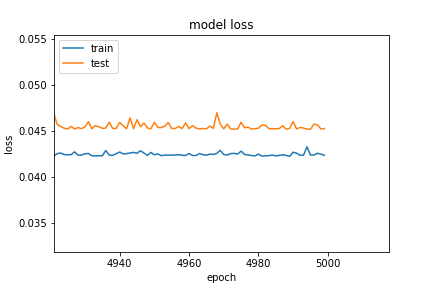

In [72]:
plt.figure()
plt.plot(history1[0].history['loss'])
plt.plot(history1[0].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
N=int(len(Xs_data)/4)
history2=[]
dz=[]
for i in range(4):
    Xs_train,ys_train=list(Xs_data.copy()),list(ys_data.copy())
    del Xs_train[i*N:i*N+N]
    del ys_train[i*N:i*N+N]
    Xs_val,ys_val=Xs_data[i*N:i*N+N],ys_data[i*N:i*N+N]
    Xs_train,ys_train=np.array(Xs_train),np.array(ys_train)
    model2 = Model1()
    model2.compile(optimizer=optimizer,loss=scoree)
    h=model2.fit(Xs_train, ys_train, validation_data=(Xs_val,ys_val), epochs=500)
    pred=model2.predict(Xs_val).reshape(len(ys_val))
    dz.append(np.array((-ys_val.reshape(len(ys_val))+pred)/(1+ys_val.reshape(len(ys_val)))))
    history2.append(h)

Epoch 1/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0892 - val_loss: 0.0654
Epoch 2/500
40/40 [==============================] - 0s 1ms/step - loss: 0.0649 - val_loss: 0.0774
Epoch 3/500
40/40 [==============================] - 0s 950us/step - loss: 0.0668 - val_loss: 0.0632
Epoch 4/500
40/40 [==============================] - 0s 1ms/step - loss: 0.0628 - val_loss: 0.0665
Epoch 5/500
40/40 [==============================] - 0s 1ms/step - loss: 0.0641 - val_loss: 0.0649
Epoch 6/500
40/40 [==============================] - 0s 965us/step - loss: 0.0636 - val_loss: 0.0645
Epoch 7/500
40/40 [==============================] - 0s 1ms/step - loss: 0.0612 - val_loss: 0.0681
Epoch 8/500
40/40 [==============================] - 0s 937us/step - loss: 0.0629 - val_loss: 0.0676
Epoch 9/500
40/40 [==============================] - 0s 1ms/step - loss: 0.0648 - val_loss: 0.0637
Epoch 10/500
40/40 [==============================] - 0s 920us/step - loss: 0.0606 - val_loss: 0.0633
E

In [44]:
hisval[-1],hisval[100]

(0.05600255280910081, 0.058928284864881546)

In [47]:
np.mean([np.std(dz[i]) for i in range(4)]),np.mean([np.mean(np.abs(dz[i])) for i in range(4)])

(0.06434764647217828, 0.04477473767127335)

<IPython.core.display.Javascript object>


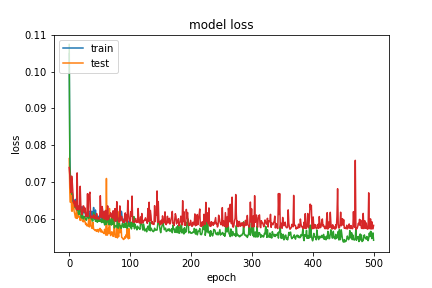

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
N=int(len(Xs_data)/4)
history3=[]
dz3=[]
for i in range(4):
    Xs_train,ys_train=list(Xs_data.copy()),list(ys_data.copy())
    del Xs_train[i*N:i*N+N]
    del ys_train[i*N:i*N+N]
    Xs_val,ys_val=Xs_data[i*N:i*N+N],ys_data[i*N:i*N+N]
    Xs_train,ys_train=np.array(Xs_train),np.array(ys_train)
    model3 = Model2()
    optimizer=tf.keras.optimizers.Adam(0.00002)
    model3.compile(optimizer=optimizer,loss='binary_crossentropy')
    h=model3.fit(Xs_train, ys_train, validation_data=(Xs_val,ys_val), epochs=5000)
    pred=model3.predict(Xs_val).reshape(len(ys_val))
    dz3.append(np.array(np.abs((-ys_val.reshape(len(ys_val))+pred)/(1+ys_val.reshape(len(ys_val))))))
    history3.append(h)

Epoch 1/5000
40/40 [==============================] - 0s 3ms/step - loss: 2.2167 - val_loss: 2.2017
Epoch 2/5000
40/40 [==============================] - 0s 1ms/step - loss: 2.2080 - val_loss: 2.1937
Epoch 3/5000
40/40 [==============================] - 0s 1ms/step - loss: 2.1998 - val_loss: 2.1855
Epoch 4/5000
40/40 [==============================] - 0s 993us/step - loss: 2.1915 - val_loss: 2.1783
Epoch 5/5000
40/40 [==============================] - 0s 1ms/step - loss: 2.1842 - val_loss: 2.1709
Epoch 6/5000
40/40 [==============================] - 0s 995us/step - loss: 2.1769 - val_loss: 2.1635
Epoch 7/5000
40/40 [==============================] - 0s 984us/step - loss: 2.1694 - val_loss: 2.1560
Epoch 8/5000
40/40 [==============================] - 0s 984us/step - loss: 2.1620 - val_loss: 2.1483
Epoch 9/5000
40/40 [==============================] - 0s 968us/step - loss: 2.1543 - val_loss: 2.1407
Epoch 10/5000
40/40 [==============================] - 0s 962us/step - loss: 2.1465 - val_

In [110]:
print('std :',np.mean([np.std(dz3[i]) for i in range(4)]),'\nmean :',np.mean([np.mean(dz3[i]) for i in range(4)]))

std : 0.05498334603812505 
mean : 0.08389924000788519


<IPython.core.display.Javascript object>


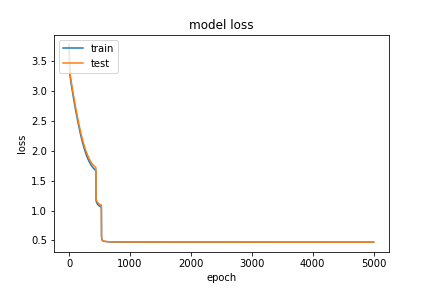

In [116]:
plot_his(history3)

In [17]:
N=int(len(Xs_data)/4)
history4=[]
dz_val,dz_train=[],[]
for i in range(4):
    Xs_train,y_train=list(Xs_data.copy()),list(y_data.copy())
    del Xs_train[i*N:i*N+N]
    del y_train[i*N:i*N+N]
    Xs_val,y_val=Xs_data[i*N:i*N+N],y_data[i*N:i*N+N]

    ouscaler= MinMaxScaler()
    ys_train= ouscaler.fit_transform(np.array(y_train).reshape(-1,1))
    ys_val  = ouscaler.transform(np.array(y_val).reshape(-1,1))

    Xs_train,Xs_val,ys_train,ys_val,y_val,y_train=np.array(Xs_train),np.array(Xs_val),np.array(ys_train),np.array(ys_val),np.array(y_val),np.array(y_train)

    model4 = Model2(1e-5)
    optimizer=tf.keras.optimizers.Adam(0.0001)
    model4.compile(optimizer=optimizer,loss='MAE')
    h=model4.fit(Xs_train, ys_train, validation_data=(Xs_val,ys_val), epochs=5000,verbose=0)
    
    pred_train=ouscaler.inverse_transform(model4.predict(Xs_train)).reshape(len(y_train))
    pred_val=ouscaler.inverse_transform(model4.predict(Xs_val)).reshape(len(y_val))
    dz_val.append(np.array((pred_val-y_val)/(1+y_val)))
    dz_train.append(np.array((pred_train-y_train)/(1+y_train)))
    print('std train:',np.std(dz_train[-1]),'\nmean train:',np.mean(dz_train[-1]))
    print('std val:',np.std(dz_val[-1]),'\nmean val:',np.mean(dz_val[-1]))
    history4.append(h)

std train: 0.15297254858657858 
mean train: 0.015613569874834362
std val: 0.17312690082597054 
mean val: 0.03434083733731422
std train: 0.1565033655454245 
mean train: 0.018959919332919104
std val: 0.15996919597077897 
mean val: 0.021225509412287867
std train: 0.15025636486713637 
mean train: 0.0002900023906242448
std val: 0.13865727724697796 
mean val: -0.004155511968034063
std train: 0.1491042237130058 
mean train: 0.010286516489513668
std val: 0.15590660632373157 
mean val: -0.008245650737023514


In [18]:
print('train : \nstd :',np.mean([np.std(dz_train[i]) for i in range(4)]),'\nmean :',np.mean(np.abs([np.mean(dz_train[i]) for i in range(4)])))
print('val   : \nstd :',np.mean([np.std(dz_val[i]) for i in range(4)]),'\nmean :',np.mean(np.abs([np.mean(dz_val[i]) for i in range(4)])))

train : 
std : 0.1522091256780363 
mean : 0.011287502021972845
val   : 
std : 0.15691499509186477 
mean : 0.016991877363664917


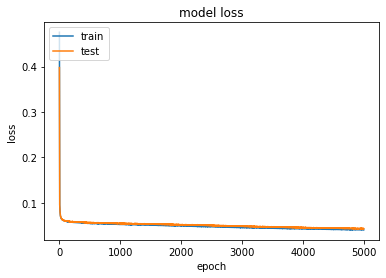

In [21]:
plot_his(history4)

In [ ]:
N=int(len(Xs_data)/4)
history6=[]
dz6=[]
for i in range(4):
    Xs_train,ys_train=list(Xs_data.copy()),list(ys_data.copy())
    del Xs_train[i*N:i*N+N]
    del ys_train[i*N:i*N+N]
    Xs_val,ys_val=Xs_data[i*N:i*N+N],ys_data[i*N:i*N+N]
    Xs_train,ys_train=np.array(Xs_train),np.array(ys_train)
    model6 = Model1()
    print_weights = LambdaCallback(on_epoch_end=lambda epoch, logs: weights.append([model6.layers[0].get_weights(),model6.layers[1].get_weights()]))
    optimizer=tf.keras.optimizers.SGD()
    model6.compile(optimizer=optimizer,loss='mean_absolute_error')
    h=model6.fit(Xs_train, ys_train, validation_data=(Xs_val,ys_val), epochs=4000,callbacks = [print_weights])
    pred=ouscaler.inverse_transform(model6.predict(Xs_val))
    y_val=ouscaler.inverse_transform(ys_val)
    dz6.append(np.array(np.abs((pred-y_val)/(1+y_val))))
    history6.append(h)

Epoch 1/4000
40/40 [==============================] - 0s 4ms/step - loss: 0.1470 - val_loss: 0.1377
Epoch 2/4000
40/40 [==============================] - 0s 831us/step - loss: 0.1335 - val_loss: 0.1245
Epoch 3/4000
40/40 [==============================] - 0s 858us/step - loss: 0.1241 - val_loss: 0.1215
Epoch 4/4000
40/40 [==============================] - 0s 840us/step - loss: 0.1136 - val_loss: 0.1066
Epoch 5/4000
40/40 [==============================] - 0s 846us/step - loss: 0.1068 - val_loss: 0.1032
Epoch 6/4000
40/40 [==============================] - 0s 862us/step - loss: 0.0977 - val_loss: 0.0902
Epoch 7/4000
40/40 [==============================] - 0s 884us/step - loss: 0.0918 - val_loss: 0.0921
Epoch 8/4000
40/40 [==============================] - 0s 861us/step - loss: 0.0860 - val_loss: 0.0884
Epoch 9/4000
40/40 [==============================] - 0s 888us/step - loss: 0.0814 - val_loss: 0.0816
Epoch 10/4000
40/40 [==============================] - 0s 866us/step - loss: 0.0785 

In [40]:
plot_his(history6)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
model6.get_weights()

[array([[-5.19358092e-01, -1.03660126e-01, -3.13818452e-01,
         -2.81610152e-02,  2.61328868e-01,  3.79349681e-01,
          2.10737460e-01,  2.50994608e-02,  4.84040373e-01,
         -2.58632419e-01,  2.10909015e-02,  1.76002065e-01,
         -2.34132588e-01,  1.37978004e-01,  4.01525451e-01,
          7.63986262e-02, -2.38478069e-01,  4.68545318e-01,
          1.66985279e-01,  3.98085303e-01, -1.69773221e-01,
          1.80107453e-01,  7.84856338e-02,  3.13706013e-01,
         -2.85524172e-01],
        [ 2.51941562e-01,  5.99671605e-01, -2.05341193e-01,
         -1.74945085e-01, -2.66251651e-01, -1.24685588e-01,
         -1.64157580e-01,  7.10140852e-02,  1.23563048e-01,
          1.85897364e-01, -8.63483029e-02, -3.43903349e-01,
          2.04318118e-02,  2.11422766e-01, -1.07776998e-01,
         -5.18544910e-02,  3.51969155e-01, -2.93015590e-02,
         -1.27443969e-01, -2.43613566e-01,  2.07561828e-01,
         -5.96044507e-02, -2.77034158e-01, -1.77811473e-01,
          5.1

In [63]:
bias=np.array([weights[i][-1][-1][0] for i in range(4000)])

In [65]:
plt.figure()
plt.plot(bias)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [78]:
def Model2():
    model = tf.keras.Sequential([
        tfl.Dense(18,'tanh',input_shape=(12,)),
        tfl.Dense(24,'tanh'),
        tfl.Dense(12,'tanh'),
        tfl.Dense(1),
        ])
    return model

In [79]:
model2 = Model2()
# Print a summary for each layer
for layer in summary(model2):
    print(layer)

['Dense', (None, 18), 234, 'tanh']
['Dense', (None, 24), 456, 'tanh']
['Dense', (None, 12), 300, 'tanh']
['Dense', (None, 1), 13, 'linear']


In [80]:
model2.compile(optimizer='adam',loss='mean_squared_error')

In [81]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 18)                234       
_________________________________________________________________
dense_19 (Dense)             (None, 24)                456       
_________________________________________________________________
dense_20 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 13        
Total params: 1,003
Trainable params: 1,003
Non-trainable params: 0
_________________________________________________________________


In [82]:
model2.fit(X_data, ys_data, epochs=100, batch_size=500)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 3/100
4/4 [==============================] - 0s 943us/step - loss: 0.0168
Epoch 4/100
4/4 [==============================] - 0s 980us/step - loss: 0.0128
Epoch 5/100
4/4 [==============================] - 0s 981us/step - loss: 0.0134
Epoch 6/100
4/4 [==============================] - 0s 935us/step - loss: 0.0120
Epoch 7/100
4/4 [==============================] - 0s 935us/step - loss: 0.0118
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 9/100
4/4 [==============================] - 0s 927us/step - loss: 0.0111
Epoch 10/100
4/4 [==============================] - 0s 951us/step - loss: 0.0113
Epoch 11/100
4/4 [==============================] - 0s 994us/step - loss: 0.0111
Epoch 12/100
4/4 [==============================] - 0s 922us/step - loss: 0.0110
Epoch 13/100
4/4 [========================

In [83]:
pred2=happy_model.predict(X_data).reshape(1686)

In [84]:
np.std((-ys_data.reshape(1686)+pred2)/(1+ys_data.reshape(1686)))

0.07418019303386438

In [71]:
X_data

K          G        CH1         W1          U          Z  \
1     18.432032  20.620443  17.464193  17.678999  21.213541  19.409750   
4     19.408987  20.385698  18.808151  18.799000  20.541595  20.166700   
8     17.858994  20.210665  17.794222  17.827999  20.844740  18.555473   
20    20.165888  21.888151  19.730434  19.923000  23.159597  21.216776   
23    19.619225  21.144905  18.730791  18.841000  21.252272  20.408800   
...         ...        ...        ...        ...        ...        ...   
6402  19.175245  20.479815  18.534843  18.209999  21.031319  19.990618   
6447  16.476257  17.927307  17.435349  17.337999  20.023039  16.459816   
6637  17.598835  20.821667  17.775841  17.860001  23.009541  18.338795   
6673  15.084570  17.545454  14.778374  15.339000  19.150385  16.122732   
6736  17.677208  19.211903  17.728415  17.702000  19.556065  17.770361   

              J         W2          I          H          R        CH2  
1     18.962244  17.138000  19.716251  18.743366  19.989361  17.076193  
4     19.725740  18.451000  20.271524  19.933990  20.250439  18.720428  
8     18.425730  17.687000  18.990084  18.178875  19.405510  17.544395  
20    20.508423  19.136000  21.586559  20.293821  21.535547  19.528378  
23    20.048107  18.646999  20.872396  19.778837  20.871641  18.691008  
...         ...        ...        ...        ...        ...        ...  
6402  19.288706  17.856001  20.342691  19.647400  20.276905  18.125502  
6447  16.234339  17.950001  16.670277  16.120283  17.028492  17.877598  
6637  18.118828  18.104000  18.691484  17.782110  19.289705  17.991066  
6673  15.222370  15.932000  16.358797  15.002162  16.760162  15.203849  
6736  17.863588  17.844999  18.090391  17.614721  18.421732  18.294374  

[1686 rows x 12 columns]